##YOLOv7: Trainable bag-of-freebies sets new state-of-the-art for real-time object detectors

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# if not os.path.exists('/content/gdrive/MyDrive/yolov7'):
#     os.mkdir('/content/gdrive/MyDrive/yolov7')

# %cd /content/gdrive/MyDrive/yolov7

In [ ]:
import yaml
import torch
from IPython.display import Image, clear_output
from PIL import Image

In [ ]:
# YOLOv7 github clone

!git clone https://github.com/WongKinYiu/yolov7

Cloning into 'yolov7'...
remote: Enumerating objects: 920, done.
remote: Counting objects: 100% (75/75), done.
remote: Compressing objects: 100% (65/65), done.
remote: Total 920 (delta 21), reused 46 (delta 9), pack-reused 845
Receiving objects: 100% (920/920), 68.25 MiB | 20.67 MiB/s, done.
Resolving deltas: 100% (446/446), done.


In [ ]:
%pip install -qr requirements.txt

     |████████████████████████████████| 1.6 MB 6.8 MB/s 


In [ ]:
%cd /content/yolov7

/content/yolov7


In [ ]:
# roboflow.com yolov7 pythorch dataset download(2015개 images)

%mkdir /content/yolov7/bolles
%cd /content/yolov7/bolles

!curl -L "https://app.roboflow.com/ds/BLRBxSqCGN?key=V9hGOHb3MH" > bolles.zip; unzip bolles.zip;

In [ ]:
from glob import glob

train_img_list = glob('/content/yolov7/bolles/train/images/*.jpg')
test_img_list = glob('/content/yolov7/bolles/test/images/*.jpg')
valid_img_list = glob('/content/yolov7/bolles/valid/images/*.jpg')

print(len(train_img_list),len(test_img_list),len(valid_img_list))

1409 205 401


In [ ]:
import yaml

with open('/content/yolov7/bolles/train.txt', 'w') as f:
  f.write('\n'.join(train_img_list) + '\n')

with open('/content/yolov7/bolles/test.txt', 'w') as f:
  f.write('\n'.join(train_img_list) + '\n')

with open('/content/yolov7/bolles/val.txt', 'w') as f:
  f.write('\n'.join(train_img_list) + '\n')

In [ ]:
from IPython.core.magic import register_line_cell_magic

@register_line_cell_magic
def writetemplate(line,cell):
  with open(line, 'w') as f:
    f.write(cell.format(**globals()))

In [ ]:
%cat /content/yolov7/bolles/data.yaml

train: ../train/images
val: ../valid/images

nc: 2
names: ['bollard', 'electricscooter']

In [ ]:
%%writetemplate /content/yolov7/bolles/data.yaml

train: ./bolles/train/images
test: ./bolles/test/images
val: ./bolles/valid/images

nc: 2
names: ['bollard', 'electricscooter']

In [ ]:
%cat /content/yolov7/bolles/data.yaml


train: ./bolles/train/images
test: ./bolles/test/images
val: ./bolles/valid/images

nc: 2
names: ['bollard', 'electricscooter']


##Model Architecture

In [ ]:
import yaml

with open("/content/yolov7/bolles/data.yaml",'r') as stream:
  num_classes = str(yaml.safe_load(stream)['nc'])

%cat /content/yolov7/cfg/training/yolov7x.yaml

In [ ]:
%%writetemplate /content/yolov7/models/custom_yolov7x.yaml

# parameters
nc: {num_classes}  # number of classes
depth_multiple: 1.0  # model depth multiple
width_multiple: 1.0  # layer channel multiple

# anchors
anchors:
  - [12,16, 19,36, 40,28]  # P3/8
  - [36,75, 76,55, 72,146]  # P4/16
  - [142,110, 192,243, 459,401]  # P5/32

# yolov7 backbone
backbone:
  # [from, number, module, args]
  [[-1, 1, Conv, [40, 3, 1]],  # 0
  
   [-1, 1, Conv, [80, 3, 2]],  # 1-P1/2      
   [-1, 1, Conv, [80, 3, 1]],
   
   [-1, 1, Conv, [160, 3, 2]],  # 3-P2/4  
   [-1, 1, Conv, [64, 1, 1]],
   [-2, 1, Conv, [64, 1, 1]],
   [-1, 1, Conv, [64, 3, 1]],
   [-1, 1, Conv, [64, 3, 1]],
   [-1, 1, Conv, [64, 3, 1]],
   [-1, 1, Conv, [64, 3, 1]],
   [-1, 1, Conv, [64, 3, 1]],
   [-1, 1, Conv, [64, 3, 1]],
   [[-1, -3, -5, -7, -8], 1, Concat, [1]],
   [-1, 1, Conv, [320, 1, 1]],  # 13
         
   [-1, 1, MP, []],
   [-1, 1, Conv, [160, 1, 1]],
   [-3, 1, Conv, [160, 1, 1]],
   [-1, 1, Conv, [160, 3, 2]],
   [[-1, -3], 1, Concat, [1]],  # 18-P3/8  
   [-1, 1, Conv, [128, 1, 1]],
   [-2, 1, Conv, [128, 1, 1]],
   [-1, 1, Conv, [128, 3, 1]],
   [-1, 1, Conv, [128, 3, 1]],
   [-1, 1, Conv, [128, 3, 1]],
   [-1, 1, Conv, [128, 3, 1]],
   [-1, 1, Conv, [128, 3, 1]],
   [-1, 1, Conv, [128, 3, 1]],
   [[-1, -3, -5, -7, -8], 1, Concat, [1]],
   [-1, 1, Conv, [640, 1, 1]],  # 28
         
   [-1, 1, MP, []],
   [-1, 1, Conv, [320, 1, 1]],
   [-3, 1, Conv, [320, 1, 1]],
   [-1, 1, Conv, [320, 3, 2]],
   [[-1, -3], 1, Concat, [1]],  # 33-P4/16  
   [-1, 1, Conv, [256, 1, 1]],
   [-2, 1, Conv, [256, 1, 1]],
   [-1, 1, Conv, [256, 3, 1]],
   [-1, 1, Conv, [256, 3, 1]],
   [-1, 1, Conv, [256, 3, 1]],
   [-1, 1, Conv, [256, 3, 1]],
   [-1, 1, Conv, [256, 3, 1]],
   [-1, 1, Conv, [256, 3, 1]],
   [[-1, -3, -5, -7, -8], 1, Concat, [1]],
   [-1, 1, Conv, [1280, 1, 1]],  # 43
         
   [-1, 1, MP, []],
   [-1, 1, Conv, [640, 1, 1]],
   [-3, 1, Conv, [640, 1, 1]],
   [-1, 1, Conv, [640, 3, 2]],
   [[-1, -3], 1, Concat, [1]],  # 48-P5/32  
   [-1, 1, Conv, [256, 1, 1]],
   [-2, 1, Conv, [256, 1, 1]],
   [-1, 1, Conv, [256, 3, 1]],
   [-1, 1, Conv, [256, 3, 1]],
   [-1, 1, Conv, [256, 3, 1]],
   [-1, 1, Conv, [256, 3, 1]],
   [-1, 1, Conv, [256, 3, 1]],
   [-1, 1, Conv, [256, 3, 1]],
   [[-1, -3, -5, -7, -8], 1, Concat, [1]],
   [-1, 1, Conv, [1280, 1, 1]],  # 58
  ]

# yolov7 head
head:
  [[-1, 1, SPPCSPC, [640]], # 59
  
   [-1, 1, Conv, [320, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [43, 1, Conv, [320, 1, 1]], # route backbone P4
   [[-1, -2], 1, Concat, [1]],
   
   [-1, 1, Conv, [256, 1, 1]],
   [-2, 1, Conv, [256, 1, 1]],
   [-1, 1, Conv, [256, 3, 1]],
   [-1, 1, Conv, [256, 3, 1]],
   [-1, 1, Conv, [256, 3, 1]],
   [-1, 1, Conv, [256, 3, 1]],
   [-1, 1, Conv, [256, 3, 1]],
   [-1, 1, Conv, [256, 3, 1]],
   [[-1, -3, -5, -7, -8], 1, Concat, [1]],
   [-1, 1, Conv, [320, 1, 1]], # 73
   
   [-1, 1, Conv, [160, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [28, 1, Conv, [160, 1, 1]], # route backbone P3
   [[-1, -2], 1, Concat, [1]],
   
   [-1, 1, Conv, [128, 1, 1]],
   [-2, 1, Conv, [128, 1, 1]],
   [-1, 1, Conv, [128, 3, 1]],
   [-1, 1, Conv, [128, 3, 1]],
   [-1, 1, Conv, [128, 3, 1]],
   [-1, 1, Conv, [128, 3, 1]],
   [-1, 1, Conv, [128, 3, 1]],
   [-1, 1, Conv, [128, 3, 1]],
   [[-1, -3, -5, -7, -8], 1, Concat, [1]],
   [-1, 1, Conv, [160, 1, 1]], # 87
      
   [-1, 1, MP, []],
   [-1, 1, Conv, [160, 1, 1]],
   [-3, 1, Conv, [160, 1, 1]],
   [-1, 1, Conv, [160, 3, 2]],
   [[-1, -3, 73], 1, Concat, [1]],
   
   [-1, 1, Conv, [256, 1, 1]],
   [-2, 1, Conv, [256, 1, 1]],
   [-1, 1, Conv, [256, 3, 1]],
   [-1, 1, Conv, [256, 3, 1]],
   [-1, 1, Conv, [256, 3, 1]],
   [-1, 1, Conv, [256, 3, 1]],
   [-1, 1, Conv, [256, 3, 1]],
   [-1, 1, Conv, [256, 3, 1]],
   [[-1, -3, -5, -7, -8], 1, Concat, [1]],
   [-1, 1, Conv, [320, 1, 1]], # 102
      
   [-1, 1, MP, []],
   [-1, 1, Conv, [320, 1, 1]],
   [-3, 1, Conv, [320, 1, 1]],
   [-1, 1, Conv, [320, 3, 2]],
   [[-1, -3, 59], 1, Concat, [1]],
   
   [-1, 1, Conv, [512, 1, 1]],
   [-2, 1, Conv, [512, 1, 1]],
   [-1, 1, Conv, [512, 3, 1]],
   [-1, 1, Conv, [512, 3, 1]],
   [-1, 1, Conv, [512, 3, 1]],
   [-1, 1, Conv, [512, 3, 1]],
   [-1, 1, Conv, [512, 3, 1]],
   [-1, 1, Conv, [512, 3, 1]],
   [[-1, -3, -5, -7, -8], 1, Concat, [1]],
   [-1, 1, Conv, [640, 1, 1]], # 117
   
   [87, 1, Conv, [320, 3, 1]],
   [102, 1, Conv, [640, 3, 1]],
   [117, 1, Conv, [1280, 3, 1]],

   [[118,119,120], 1, IDetect, [nc, anchors]],   # Detect(P3, P4, P5)
  ]

In [ ]:
%cat /content/yolov7/models/custom_yolov7x.yaml

##Testing
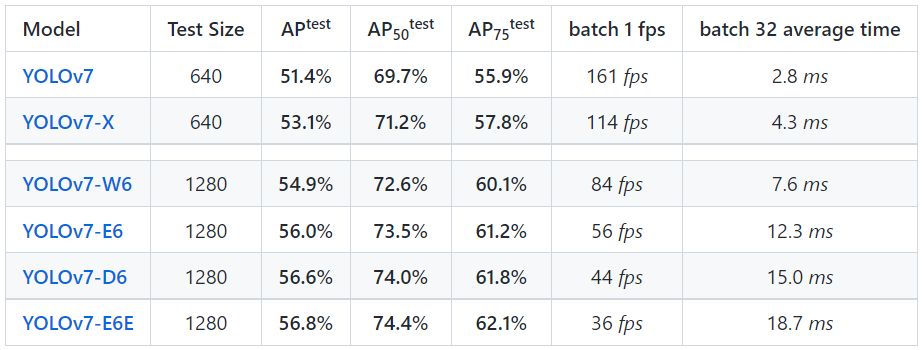

In [ ]:
!python test.py --data ./bolles/data.yaml --img 640 --batch 32 --conf 0.001 --iou 0.65 --device 0 --weights yolov7.pt --name yolov7_640_val

In [ ]:
!python train.py --batch 16 --cfg ./models/custom_yolov7x.yaml --epochs 10 --data ./bolles/data.yaml --weights 'yolov7.pt' --device 0 

#Custom Training
- img-size(img) : 입력 이미지 크기 정의(default 640,640)
- batch-size : 배치 크기 결정(default 16)
- epochs : 학습 기간 개수 정의(default 300)
- data : 모델 구성 지정(default data/coco.yaml)
- weights : 가중치에 대한 경로 지정(default yolo7.pt)
- workers : dataloader workers maximum 수(default 8)
- device : cuda device(ex, 0 or 0,1,2,3 or cpu)
- name : 결과 이름
- cfg : model.yaml 위치
- hyp : 하이퍼파라메터 위치(default data/hyp.scratch.p5.yaml)

In [ ]:
%cd /content/yolov7
!wget https://github.com/WongKinYiu/yolov7/releases/download/v0.1/yolov7x.pt

In [ ]:
import torch, gc
gc.collect()
torch.cuda.empty_cache()

In [ ]:
%%time
%cd /content/yolov7/

!python train.py --batch 8 --cfg ./models/custom_yolov7x.yaml --epochs 10 --data ./bolles/data.yaml --weights 'yolov7x.pt' --device 0 

/content/yolov7
YOLOR 🚀 v0.1-107-g44d8ab4 torch 1.12.1+cu113 CUDA:0 (Tesla P100-PCIE-16GB, 16280.875MB)

Namespace(adam=False, artifact_alias='latest', batch_size=8, bbox_interval=-1, bucket='', cache_images=False, cfg='./models/custom_yolov7x.yaml', data='./bolles/data.yaml', device='0', entity=None, epochs=10, evolve=False, exist_ok=False, freeze=[0], global_rank=-1, hyp='data/hyp.scratch.p5.yaml', image_weights=False, img_size=[640, 640], label_smoothing=0.0, linear_lr=False, local_rank=-1, multi_scale=False, name='exp', noautoanchor=False, nosave=False, notest=False, project='runs/train', quad=False, rect=False, resume=False, save_dir='runs/train/exp', save_period=-1, single_cls=False, sync_bn=False, total_batch_size=8, upload_dataset=False, weights='yolov7x.pt', workers=8, world_size=1)
tensorboard: Start with 'tensorboard --logdir runs/train', view at http://localhost:6006/
hyperparameters: lr0=0.01, lrf=0.1, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum

# 학습결과 확인

In [ ]:
%load_ext tensorboard
%tensorboard --logdir runs

In [ ]:
!ls /content/yolov7/runs/train/exp/

confusion_matrix.png				   test_batch2_labels.jpg
events.out.tfevents.1662100253.d5cf813c9fc2.860.0  test_batch2_pred.jpg
F1_curve.png					   train_batch0.jpg
hyp.yaml					   train_batch1.jpg
opt.yaml					   train_batch2.jpg
P_curve.png					   train_batch3.jpg
PR_curve.png					   train_batch4.jpg
R_curve.png					   train_batch5.jpg
results.png					   train_batch6.jpg
results.txt					   train_batch7.jpg
test_batch0_labels.jpg				   train_batch8.jpg
test_batch0_pred.jpg				   train_batch9.jpg
test_batch1_labels.jpg				   weights
test_batch1_pred.jpg


In [ ]:
from PIL import Image
Image.open('/content/yolov7/runs/train/exp/PR_curve.png')

In [ ]:
Image.open('/content/yolov7/runs/train/exp/results.png')

In [ ]:
Image.open('/content/yolov7/runs/train/exp/train_batch0.jpg')

In [ ]:
Image.open('/content/yolov7/runs/train/exp/test_batch0_labels.jpg')

##Transfer learning
- 전이학습 용 weight 다운로드
- https://github.com/WongKinYiu/yolov7/releases/download/v0.1/yolov7_training.pt
- https://github.com/WongKinYiu/yolov7/releases/download/v0.1/yolov7x_training.pt
- https://github.com/WongKinYiu/yolov7/releases/download/v0.1/yolov7-w6_training.pt
- https://github.com/WongKinYiu/yolov7/releases/download/v0.1/yolov7-e6_training.pt
- https://github.com/WongKinYiu/yolov7/releases/download/v0.1/yolov7-d6_training.pt
- https://github.com/WongKinYiu/yolov7/releases/download/v0.1/yolov7-e6e_training.pt

In [ ]:
#!wget https://github.com/WongKinYiu/yolov7/releases/download/v0.1/yolov7_training.pt

In [ ]:
#!wget https://github.com/WongKinYiu/yolov7/releases/download/v0.1/yolov7x_training.pt

In [ ]:
#!python train.py --workers 8 --device 0 --batch-size 32 --data data/custom.yaml --img 640 640 --cfg cfg/training/yolov7-custom.yaml --weights 'yolov7_training.pt' --name yolov7-custom --hyp data/hyp.scratch.custom.yaml

##Inference

In [ ]:
# on video
!python detect.py --weights /content/yolov7/runs/train/exp/weights/best.pt --conf 0.25 --img-size 640 --source /content/gdrive/MyDrive/yolov5_sidewalk/mp4/sun-9.mp4

In [ ]:
!cp /content/yolov7/runs/detect/exp2/sun-9.mp4 /content/gdrive/MyDrive/yolov7_sidewalk/sun-9-v7.mp4

In [ ]:
# on image
!python detect.py --weights /content/yolov7/runs/train/exp/weights/best.pt --conf 0.25 --img-size 640 --source /content/yolov7/bolles/test/images/

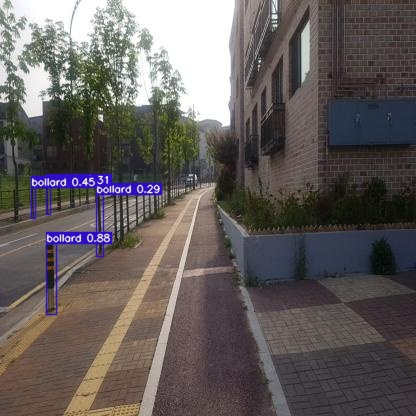

In [ ]:
#random display inference on ALL test images

import glob
import random
from IPython.display import Image, display

image_name = random.choice(glob.glob('/content/yolov7/runs/detect/exp3/*.jpg'))
display(Image(filename=image_name))

In [ ]:
#display inference on ALL test images

import glob
from IPython.display import Image, display

i = 0
limit = 10000 # max images to print
for imageName in glob.glob('/content/yolov7/runs/detect/exp3/*.jpg'): #assuming JPG
    if i < limit:
      display(Image(filename=imageName))
      print("\n")
    i = i + 1